Skyline- EEG preprocessing script 
--------------------------------------------------

Steps based on the protocol:

Preliminary:
- re-referenced to average reference

Two-steps artefacts rejection:
1. ICA:
    - band pass filter using non-causal 4th order Butterworth filter between 1Hz and 30Hz
    - downsample to 256Hz
    - visual inspection to remove artefacts
    - run ICA and reject eye-movement and muscles activity artefacts
    - save ICA solution on a file
    
2. On a copy of orginal dataset:
    - filter:try out fourth order Butterworth filters: high pass causal filter at 2Hz and low-pass non-causal filter at 30Hz -> see if any distortion

TO DO: get channel location file !!

Imports

In [20]:
import os
import mne
import numpy as np
from mne_bids import make_bids_folders, make_bids_basename
from mne.preprocessing import (ICA,corrmap)

In [24]:
%matplotlib qt

Specify derivatives folder structure


In [2]:
bids_root = '/home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS'
bids_root_der = os.path.join(bids_root, 'derivatives')
if not os.path.exists(bids_root_der):
    os.makedirs(bids_root_der)

ana_root = os.path.join(bids_root_der, 'eeg_pre_process')
if not os.path.exists(ana_root):
    os.makedirs(ana_root)
  
#create sub folder for pp, sessions

Load data

In [13]:
#
subject_ids=[608]#, 690,429,558,278,148, 276,647,562,477,703,786,726,743,763,507,388,428,375,747,754,279,572,339,667,594,188,545,681,750,330,753,271,295]
sessions=[1]#, 2]

for subj in subject_ids:
    for sess in sessions:
        # creates bids-compatible derivative folderbk
        path_folder =  make_bids_folders(subject = str(subj), session= str(sess),
                                kind='eeg', bids_root=ana_root,make_dir=True, overwrite =False)
        
        bids_basename = make_bids_basename(subject=str(subj), session=str(sess))
        bids_fname = bids_basename + '_eeg.vhdr'
       
             
        fname = os.path.join(bids_root, 'sub-%d' %subj,  'ses-%d' %sess, 'eeg', bids_fname)

        raw = mne.io.read_raw_brainvision(fname, preload=True)

        events,_ = mne.events_from_annotations(raw)

        events_dict={'go': 11, 'nogo': 13, 'hw': 21, 'neg': 25, 'neut': 22, 'button_press':8, 'fixation':44}  

        

Extracting parameters from /home/claire/Documents/STUDY/EEG-Tobacco/Skyline-EEG-BIDS/sub-608/ses-1/eeg/sub-608_ses-1_eeg.vhdr...
Setting channel info structure...
Reading 0 ... 1765639  =      0.000 ...  1765.639 secs...
Used Annotations descriptions: ['New Segment/', 'Stimulus/S  8', 'Stimulus/S 11', 'Stimulus/S 13', 'Stimulus/S 21', 'Stimulus/S 22', 'Stimulus/S 25', 'Stimulus/S 44', 'Stimulus/S 50', 'Stimulus/S 55']


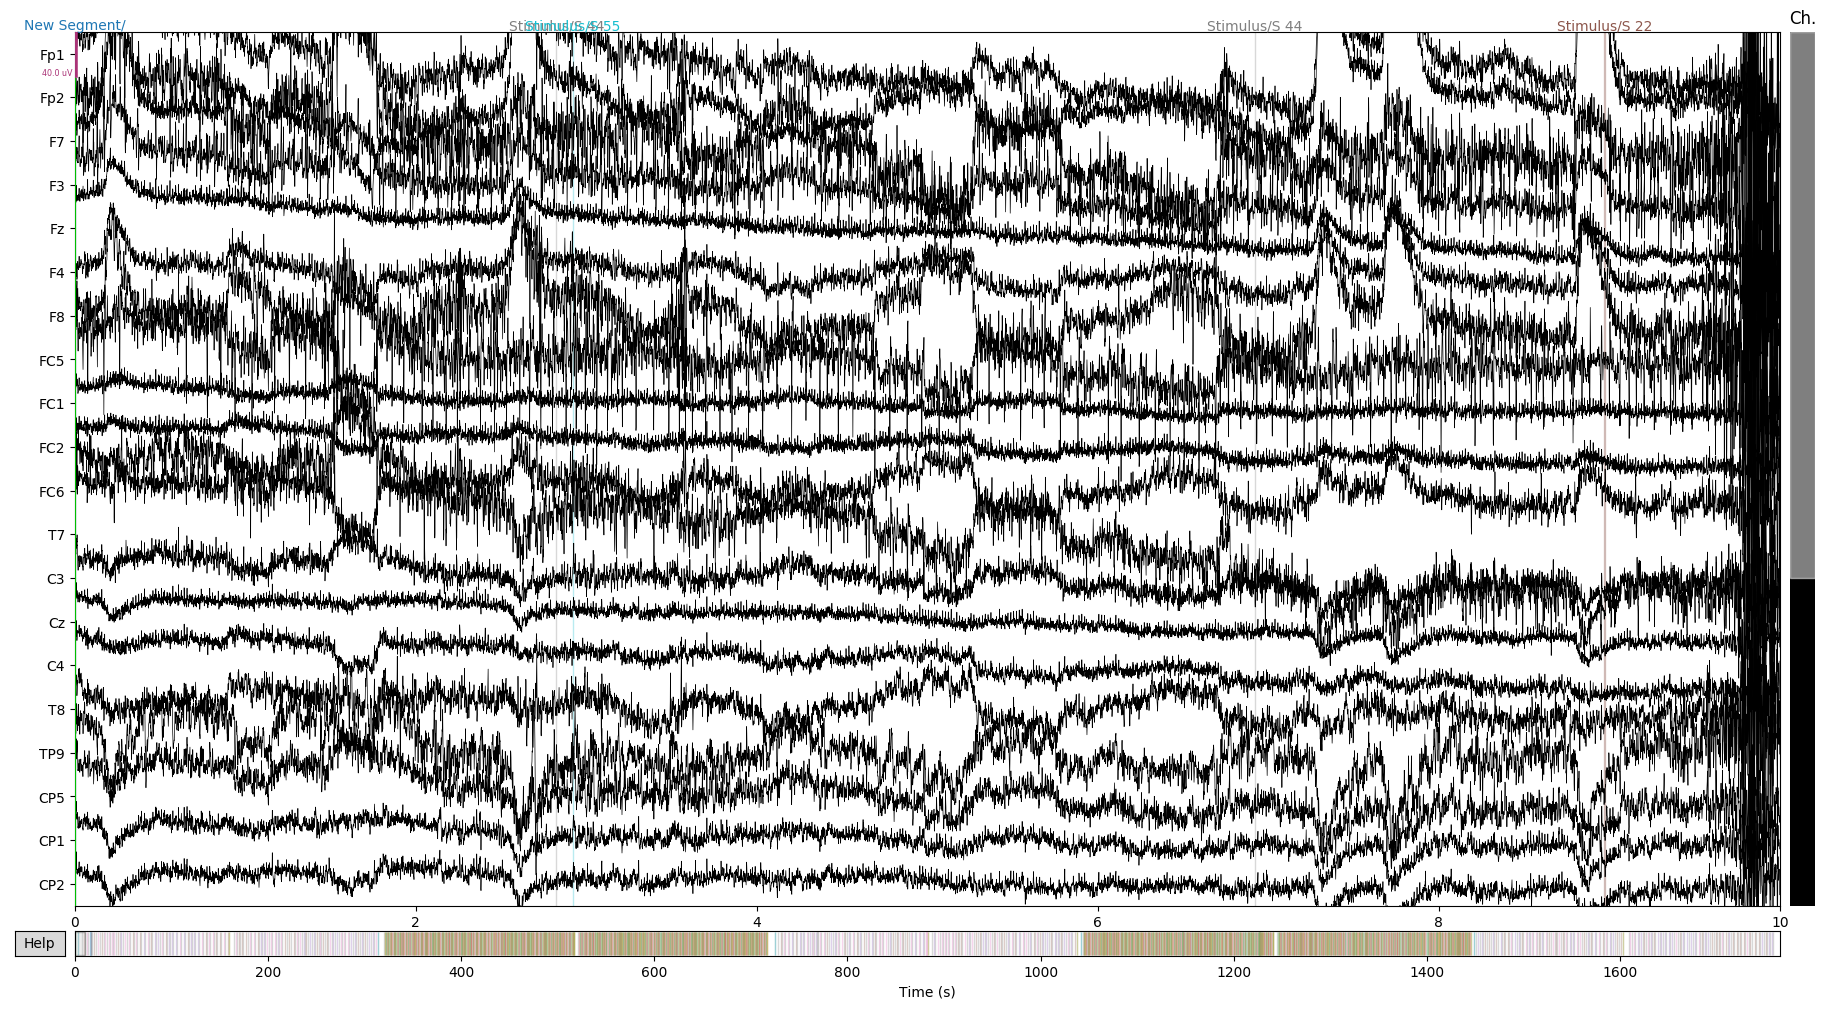

Traceback (most recent call last):
  File "/home/claire/.local/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 216, in process
    func(*args, **kwargs)
  File "/home/claire/.local/lib/python3.7/site-packages/mne/viz/utils.py", line 1098, in _mouse_click
    xdata = event.xdata - params['first_time']
TypeError: unsupported operand type(s) for -: 'NoneType' and 'int'
Traceback (most recent call last):
  File "/home/claire/.local/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 216, in process
    func(*args, **kwargs)
  File "/home/claire/.local/lib/python3.7/site-packages/mne/viz/utils.py", line 1098, in _mouse_click
    xdata = event.xdata - params['first_time']
TypeError: unsupported operand type(s) for -: 'NoneType' and 'int'
Traceback (most recent call last):
  File "/home/claire/.local/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 216, in process
    func(*args, **kwargs)
  File "/home/claire/.local/lib/python3.7/site-packages/mne/v

In [28]:
        raw.plot()

Artefact rejection on continuuous data

In [30]:
        # high pass filter data for ICA
        filt_raw =  raw.copy()
        filt_raw.load_data().filter(l_freq=1., h_freq=None)

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 3301 samples (3.301 sec)



<RawBrainVision  |  sub-608_ses-1_eeg.eeg, n_channels x n_times : 32 x 1765640 (1765.6 sec), ~431.1 MB, data loaded>

In [31]:
        ica = ICA(n_components=15, random_state=97)
        ica.fit(filt_raw)

Fitting ICA to data using 26 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Omitting 72190 of 1765640 (4.09%) samples, retaining 1693450 (95.91%) samples.
Selection by number: 15 components
Fitting ICA took 35.9s.


<ICA  |  raw data decomposition, fit (fastica): 1693450 samples, 15 components, channels used: "eeg">

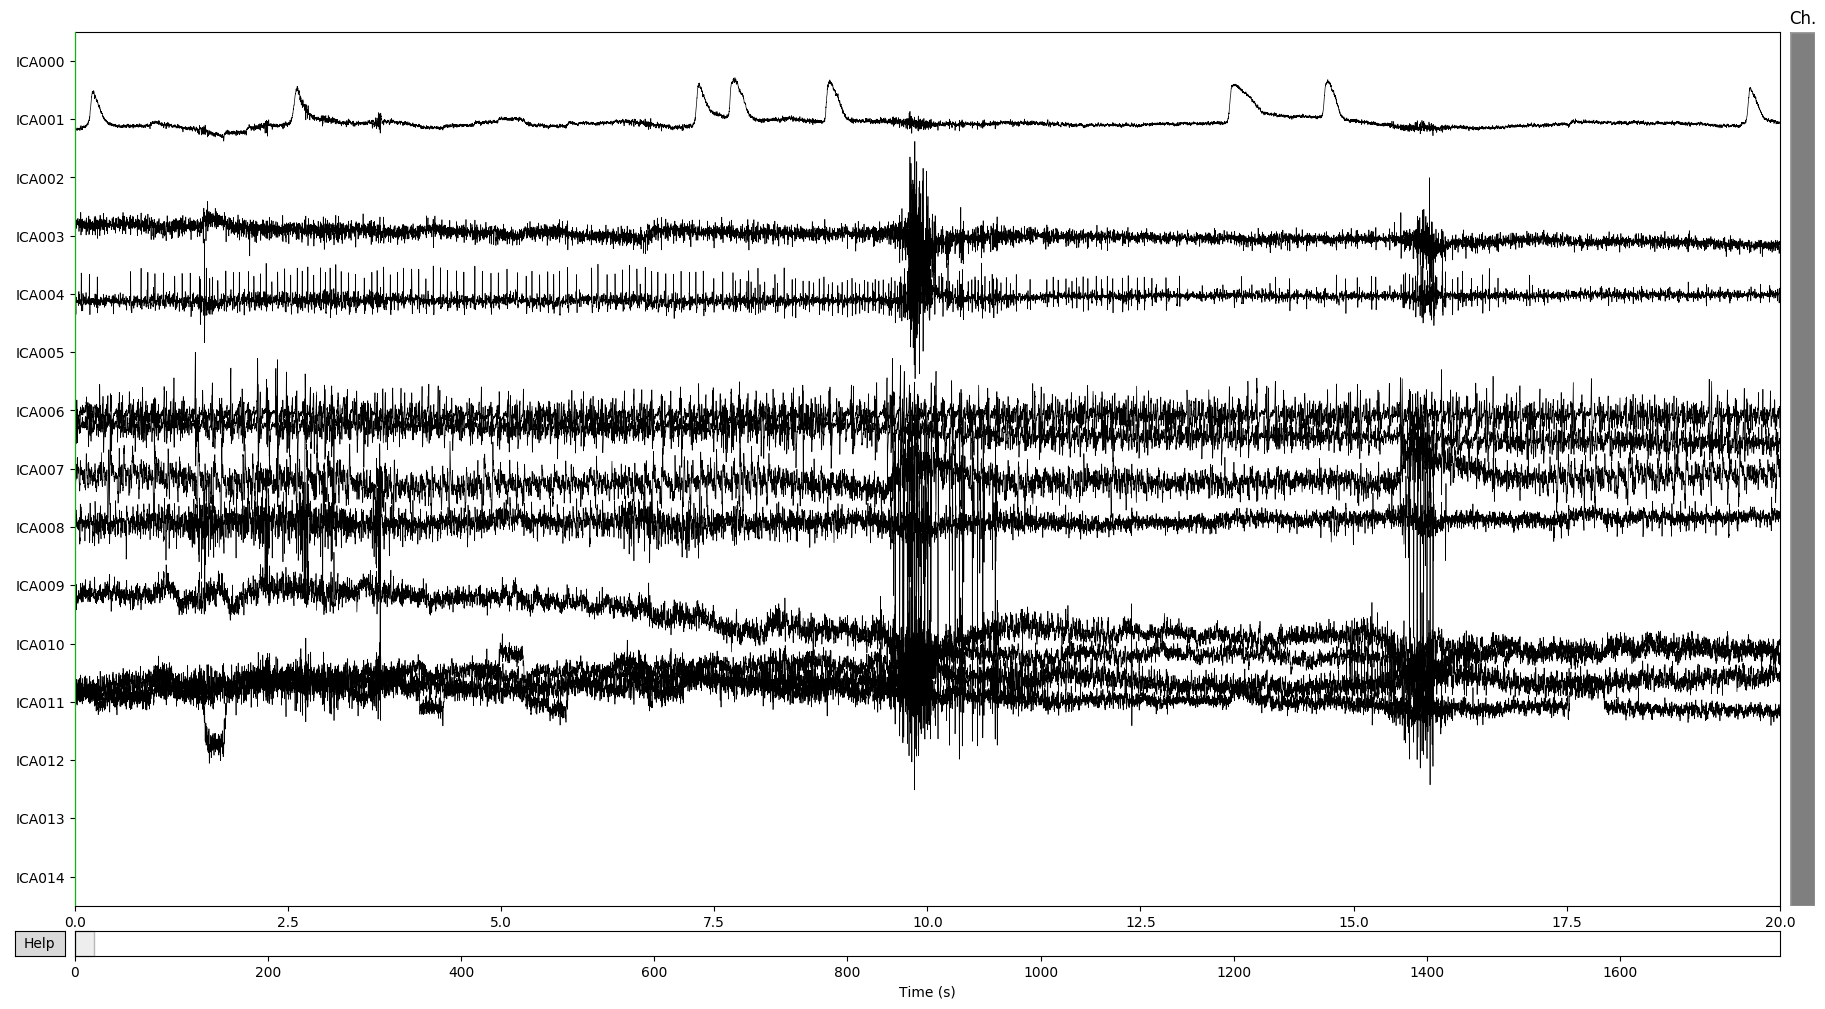

Traceback (most recent call last):
  File "/home/claire/.local/lib/python3.7/site-packages/mne/viz/ica.py", line 1074, in _label_clicked
    None)
  File "/home/claire/.local/lib/python3.7/site-packages/mne/viz/topomap.py", line 74, in _prepare_topo_plot
    pos = _find_topomap_coords(info, picks)
  File "/home/claire/.local/lib/python3.7/site-packages/mne/channels/layout.py", line 617, in _find_topomap_coords
    pos = _auto_topomap_coords(info, picks)
  File "/home/claire/.local/lib/python3.7/site-packages/mne/channels/layout.py", line 676, in _auto_topomap_coords
    raise RuntimeError('No digitization points found.')
RuntimeError: No digitization points found.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/claire/.local/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 216, in process
    func(*args, **kwargs)
  File "/home/claire/.local/lib/python3.7/site-packages/mne/viz/utils.py", line 1119, in

In [32]:
        ica.plot_sources(raw)

In [33]:
        ica.plot_components()

RuntimeError: No digitization points found.

Epoch data
-----------------

Passive viewing task timing (in ms): 
    - isi 1500-3000
    - stim pres: 1000-1400
    - in protocol: epoch between -300 and 1000ms
    
Go-Nogo task timing (in ms):
    - isi: 500-800
    - stim pres: 600
    - in protocol: epoch between -300 and 600ms

Epoch passive viewing


In [16]:
tmin_pv, tmax_pv = -3, 1
event_dict_pv = {'hw': 21, 'neg': 25, 'neut': 22}

epochs_pv = mne.Epochs(raw, events, event_dict_pv, preload=True)

246 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 246 events and 701 original time points ...
0 bad epochs dropped


In [17]:
print(epochs_pv.event_id)

{'hw': 21, 'neg': 25, 'neut': 22}
